In [1]:
import pandas as pd

In [2]:
# import seaborn and matplotlib for creating detailed graphs of the sales data
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Use Pandas to read in the sales data from the CSV file provided
df_sales = pd.read_csv('data\sales_dataset.csv')

In [4]:
# In the original dataset, there are white spaces in 'Month' column at the end of 'February'. 
# Stripping the white space to avoid issues for the analysis later on.
df_sales['Month'] = df_sales['Month'].str.replace(" ", "")
df_sales

,Product Name,Category,Sale Price,Quantity Sold,Month,Customer Name
0,T-shirts,Clothing,10.99,20,December,John Smith
1,Levi's Jeans,Clothing,59.99,18,April,Samantha Davis
2,Dyson Vacuum,Home,599.99,2,August,David Williams
3,Sunglasses,Accessories,21.22,15,May,Kelly Williams
4,Headphones,Electronics,8.99,40,October,Chris Brown
5,Water bottles,Accessories,14.14,22,August,Amy Lee
6,Backpacks,Accessories,18.99,27,July,William Smith
7,Hats,Accessories,29.99,35,September,Emily Davis
8,Books,Media,11.99,18,March,Robert Johnson
9,Toys,Toys,17.99,29,December,Kimberly White


In [5]:
# Calculate the total sales amount for each product
df_sales['total_sales'] = df_sales['Sale Price'] * df_sales['Quantity Sold']

In [6]:
# create a new dataframe with two columns
df_total_sales = df_sales[['Product Name', 'total_sales']]

# Calculate the total sales for each product, sort by desceding orders. 
df_total_sales.sort_values('total_sales', ascending=False)

,Product Name,total_sales
12,Samsung Galaxy,4499.95
13,iPhone 13,3899.97
11,Lawn mower,2975.76
24,Michael Kors Handbag,2799.92
23,Sony PlayStation 5,1999.96
18,Oakley Sunglasses,1799.88
17,Apple Watch,1599.96
29,Schwinn Exercise Bike,1499.97
22,Nest Thermostat,1499.94
19,Fitbit Charge 5,1349.91


In [7]:
category_grp = df_sales.groupby('Category')

# Calculate the average sale price for each product category by using mean
category_grp['Sale Price'].mean()

Category
Accessories     97.386667
Clothing        55.240000
Electronics    495.121250
Fitness        246.656667
Food            10.990000
Home           416.656667
Home decor      22.740000
Kitchen        164.990000
Media           13.990000
Outdoor        123.990000
Toys            17.990000
Name: Sale Price, dtype: float64

In [8]:
# Calculate the average sale price for each product category by using median to exclude extreme large values in each category
# We should use median as a more accurate reflection of the average price. 
category_grp['Sale Price'].median()

Category
Accessories     25.605
Clothing        44.990
Electronics    449.990
Fitness        149.990
Food            10.990
Home           399.990
Home decor      22.740
Kitchen        164.990
Media           13.990
Outdoor        123.990
Toys            17.990
Name: Sale Price, dtype: float64

In [9]:
# Group sales data by month and calculate the total sales for each month
monthly_sales_df = df_sales.groupby('Month', as_index=False)['total_sales'].sum()

# Convert the result to a DataFrame then sort by total_sales in descending order. 
monthly_sales_df.sort_values('total_sales', ascending=False)

,Month,total_sales
3,February,6499.66
2,December,6341.14
4,July,5112.53
8,November,5042.03
10,September,3899.53
0,April,3229.65
1,August,2395.03
6,March,2315.52
5,June,1851.62
7,May,1339.24


In [10]:
# Identify the month with the highest sales and the month with the lowest sales, and print it out
print(f"Month with highest sales is {monthly_sales_df['Month'][3]}. Total sales amount is £{monthly_sales_df['total_sales'][3]}.")
print("Month with lowest sales is January. Total sales amount is £0.")

Month with highest sales is February. Total sales amount is £6499.66.
Month with lowest sales is January. Total sales amount is £0.


In [11]:
# Group the sales by customer name then count the total sales of each customer.
customer_grp = df_sales.groupby('Customer Name')
customer_purchase = customer_grp['total_sales'].sum()

In [12]:
# Determine which customers made the most purchases and how much they spent in total
most_purchase_customer = customer_purchase.idxmax()
print(f"Customer {most_purchase_customer} made the most purchase and £{customer_purchase[most_purchase_customer]} was spent in total.")

Customer Jane Doe made the most purchase and £7299.87 was spent in total.


In [13]:
# Define the order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_sales_df['Month'] = pd.Categorical(monthly_sales_df['Month'], categories=months_order, ordered=True)
monthly_sales_df = monthly_sales_df.sort_values(["Month"])
monthly_sales_df

,Month,total_sales
3,February,6499.66
6,March,2315.52
0,April,3229.65
7,May,1339.24
5,June,1851.62
4,July,5112.53
1,August,2395.03
10,September,3899.53
9,October,359.60
8,November,5042.03


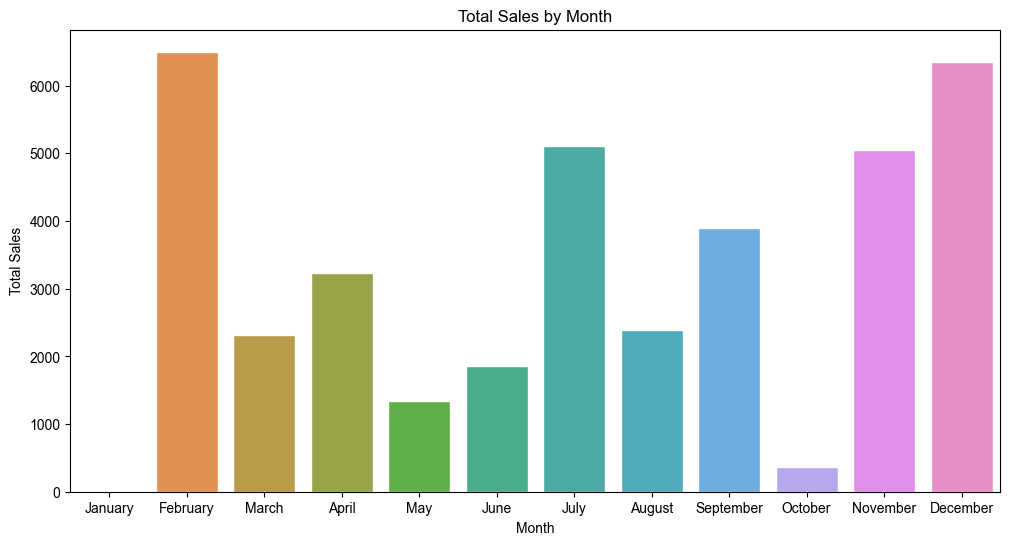

In [14]:
# Create a bar plot of the total sales for each month
# Set the plot width
fig, ax = plt.subplots(figsize=(12, 6))
sns.set(style='whitegrid')
sns.barplot(x='Month', y='total_sales', data=monthly_sales_df)

# Set the plot title and axis labels
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Show the plot
plt.show()

In [15]:
# Calculate additional metrics (e.g. median sale price, standard deviation of sale prices)
df_sales.describe()

,Sale Price,Quantity Sold,total_sales
count,33.000000,33.000000,33.000000
mean,221.593939,15.000000,1163.198485
std,307.976373,11.219403,1061.765411
min,3.490000,1.000000,66.310000
25%,17.990000,4.000000,359.600000
50%,89.990000,15.000000,799.990000
75%,349.990000,24.000000,1499.940000
max,1299.990000,40.000000,4499.950000
